# **Import Libraries and Show an Example**

Submitted by: **Rukshar Alam**

[SpaCy’s named entity recognition](https://spacy.io/api/data-formats#section-named-entities) has been trained on the OntoNotes 5 corpus and it supports the following entity types:
<img src="https://miro.medium.com/max/3000/1*qQggIPMugLcy-ndJ8X_aAA.png">


Update Spacy to use a better pretrained model [en_core_web_trf](https://spacy.io/models/en#en_core_web_trf) instead of using en_core_web_sm

In [ ]:
!pip install -U spacy  
!python -m spacy validate


     |████████████████████████████████| 6.4MB 3.3MB/s 
     |████████████████████████████████| 460kB 47.0MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 624kB 39.0MB/s 
     |████████████████████████████████| 10.1MB 19.8MB/s 
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
2021-07-15 01:48:11.351019: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.1.0) =========

In [ ]:
!python -m spacy download en_core_web_trf

2021-07-15 01:48:16.688291: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 460.2MB 26kB/s 
     |████████████████████████████████| 1.0MB 4.0MB/s 
     |████████████████████████████████| 2.3MB 6.6MB/s 
     |████████████████████████████████| 3.3MB 20.7MB/s 
     |████████████████████████████████| 901kB 37.0MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
!pip install spacy[transformers]

In [1]:
#When I'm not using SPacy libraries I run this import code instead
from collections import Counter
from pprint import pprint
import os
import pandas as pd
from tqdm import tqdm
import pickle 

In [ ]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
import en_core_web_trf
from pprint import pprint
import os
import pandas as pd
import spacy_transformers
from tqdm import tqdm
import pickle 

#nlp = en_core_web_sm.load()
nlp = spacy.load("en_core_web_trf")

/usr/local/lib/python3.7/dist-packages/spacy/util.py:738: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.1.0,<3.2.0
  warnings.warn(warn_msg)


One of the nice things about Spacy is that we only need to apply nlp once, the entire background pipeline will return the objects.

In [ ]:
##Example NER
doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


# **Mounting Drive, Loading Data, and Merging Text Data**

In [3]:
from google.colab import drive #mounting google drive where I keep my files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_directory =  '/content/gdrive/My Drive/Omdena/Data/'
files = os.listdir(data_directory)
pprint(files)
files_directory = [data_directory+file for file in files]
#pprint(files_directory)
news_df = [] #load all csv files in this array
for file_directory in files_directory[:4]: #leaving out daily sun data because different encoding has to be used for it
  
  df = pd.read_csv(file_directory)
  print(file_directory)
  news_df.append(df)

df = pd.read_csv(files_directory[4],  encoding='cp1252') #loading daily sun data with different encoding
news_df.append(df)

#print the column names of each df
for df in news_df:
  print(df.columns)

['prothom_alo_modified.csv',
 'prothom_alo_1jan2019-31dec2020_v1.csv',
 'RoadAccidentsTheDailyObserver.csv',
 'Dhaka Tribune Complete Data.csv',
 'The_Daily_Sun.csv',
 'news_title_description_ner_rukshar.csv']
/content/gdrive/My Drive/Omdena/Data/prothom_alo_modified.csv
/content/gdrive/My Drive/Omdena/Data/prothom_alo_1jan2019-31dec2020_v1.csv
/content/gdrive/My Drive/Omdena/Data/RoadAccidentsTheDailyObserver.csv
/content/gdrive/My Drive/Omdena/Data/Dhaka Tribune Complete Data.csv
Index(['date_of_incident', 'time_of_incident', 'incident_type', 'location',
       'death_count', 'injury_count', 'type_of_vehicle1', 'type_of_vehicle2',
       'description_text', 'published-time', 'full_text'],
      dtype='object')
Index(['date_of_incident', 'time_of_incident', 'incident_type', 'location',
       'death_count', 'injury_count', 'type_of_vehicle1', 'type_of_vehicle2',
       'driver_age', 'description_text', 'published-time', 'link',
       'full_text'],
      dtype='object')
Index(['links'

Based on the columns, we consider only the description and the title columns of each dataframe. 

In [ ]:
df_1 = news_df[0][['description_text', 'full_text']]
df_2 = news_df[1][['description_text', 'full_text']]
df_3 = news_df[2][['titles', 'News']]
df_4 = news_df[3][['News title','Header']]
df_5 = news_df[4][['headline', 'summary']]
news_df_only_text = [df_1, df_2, df_3,df_4, df_5]
for df in news_df_only_text:
  df.columns = ['title', 'description'] #change the column names to make them same across all dfs
#concatenate all the dfs
single_news_df = pd.concat(news_df_only_text, axis = 0, ignore_index=True)
print(single_news_df.shape) #(2029, 2)

(2029, 2)


# **Create lists of NERs of all news articles**

In [ ]:
def named_entity_recognition(news_description): #return the NER of a news article
  ner_news = nlp(str(news_description))
  ner_list  = [(X.text, X.label_) for X in ner_news.ents]
  return ner_list

In [ ]:
def create_ner_lists(limit = 5):
  ner_lists = []
  print('limit ', limit)
  for i in tqdm(range(limit)):
    news_description = single_news_df.iloc[i,1]
    #print(news_description)
    #print()
    ner = named_entity_recognition(news_description)
    ner_lists.append(ner)
  return ner_lists


In [ ]:
ner_lists = create_ner_lists(limit = single_news_df.shape[0])

  0%|          | 0/2029 [00:00<?, ?it/s]

limit  2029


100%|██████████| 2029/2029 [59:55<00:00,  1.77s/it]


In [ ]:
len(ner_lists)

2029

In [ ]:
with open('/content/gdrive/My Drive/Omdena/Data/ner_list.pickle', 'wb') as handle:
  pickle.dump(ner_lists, handle, protocol=pickle.HIGHEST_PROTOCOL)

# **Named Entity Recognition of News Data**

In [ ]:

single_news_df['NER'] = single_news_df.apply(lambda x: named_entity_recognition(x['description']), axis = 1)

In [ ]:
##save this news dataframe with named entities in a csv file
single_news_df.to_csv('news_title_description_ner.csv', index=False)

In [ ]:
single_news_df

# **Extract Places Names From NER Lists**

In [4]:
ner_list_directory = '/content/gdrive/My Drive/Omdena/Data/ner_list.pickle'
##pickle load
ner_lists = pickle.load(open(ner_list_directory, 'rb'))
print(len(ner_lists)) #2029
print(ner_lists[0])

2029
[('Four', 'CARDINAL'), ('Sunday', 'DATE'), ('Dhopakhola Nimtala', 'FAC'), ('Jessore-Benapole highway', 'FAC'), ('UNB', 'ORG'), ('Sadman', 'PERSON'), ('27', 'DATE'), ('Iqbal Chowdhury', 'PERSON'), ('Bayazid', 'GPE'), ('Naim', 'PERSON'), ('35', 'DATE'), ('Ismail', 'PERSON'), ('Syed', 'PERSON'), ('45', 'DATE'), ('Badshah', 'PERSON'), ('Shahabuddin', 'PERSON'), ('Zahir Ahmed', 'PERSON'), ('five', 'CARDINAL'), ('Benapole', 'GPE'), ('Chattogram', 'GPE'), ('Jashore', 'GPE'), ('Dhopakhola', 'GPE'), ('12:25pm,', 'TIME'), ('four', 'CARDINAL'), ('Ali Newaz', 'PERSON'), ('Jessore General Hospital', 'ORG'), ('Navaran', 'GPE'), ('Md Wahid', 'PERSON')]


In [5]:
#Extract GPEs of place names for each NER list corresponding with each article
location_names = []
for ner_list in ner_lists: #pick an ner_list
  for ner in ner_list: #pick an ner from ner list
    #print(ner)
    if ner[1] == 'GPE': #if the ner be GPE or location name
      #print(ner[0])
      location_names.append(ner[0])

In [ ]:
#Saving location names 
with open('/content/gdrive/My Drive/Omdena/Data/ner_location_names.pickle', 'wb') as handle:
  pickle.dump(ner_lists, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
!pip install geopy -U

     |████████████████████████████████| 122kB 15.7MB/s 
  Found existing installation: geopy 1.17.0
    Uninstalling geopy-1.17.0:
      Successfully uninstalled geopy-1.17.0


In [7]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import geopy

In [9]:
def do_geocode(address, attempt=1, max_attempts=5):
  geolocator= Nominatim(user_agent="new_application")
  try:
      return geolocator.geocode(address)
  except GeocoderTimedOut:
      if attempt <= max_attempts:
          return do_geocode(address, attempt=attempt+1)
      raise

In [ ]:
list_of_location_codes = []
limit = len(location_names) #take first Limit amount of locations to test other heatmap codes

for i in range(len(location_names)):
  location = location_names[i]
  location = location+' '+'Bangladesh'
  location_code = do_geocode(location) #getting longitude, latitude for all location
  dic = {}
  if location_code == None:
    dic={'latitudes':'Not found', 'longitudes':'Not found'}
  else:
    dic = {'latitudes':location_code.latitude, 'longitudes':location_code.longitude}
  if dic['latitudes'] != 'Not found' and dic['longitudes'] != 'Not found' :
    list_of_location_codes.append(dic)
  if i== limit:
    break
  if i%50==0:
    print(i)




In [ ]:
sdlfjlsf;ajslkd #to stop code execution here

In [ ]:
##save coordinates of first 1000 locations
with open('/content/gdrive/My Drive/Omdena/Data/location_coordinates_1000.pickle', 'wb') as handle:
  pickle.dump(list_of_location_codes, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
coordinate_df = pd.DataFrame(list_of_location_codes)

In [ ]:
coordinate_df.to_csv('/content/gdrive/My Drive/Omdena/Data/coordinates_1000.csv', index=False)

Using this coordinate csv file, I followed the following tutorial to plot them in a heatmap in MapBox: https://www.youtube.com/watch?v=LE5buK3_7ok

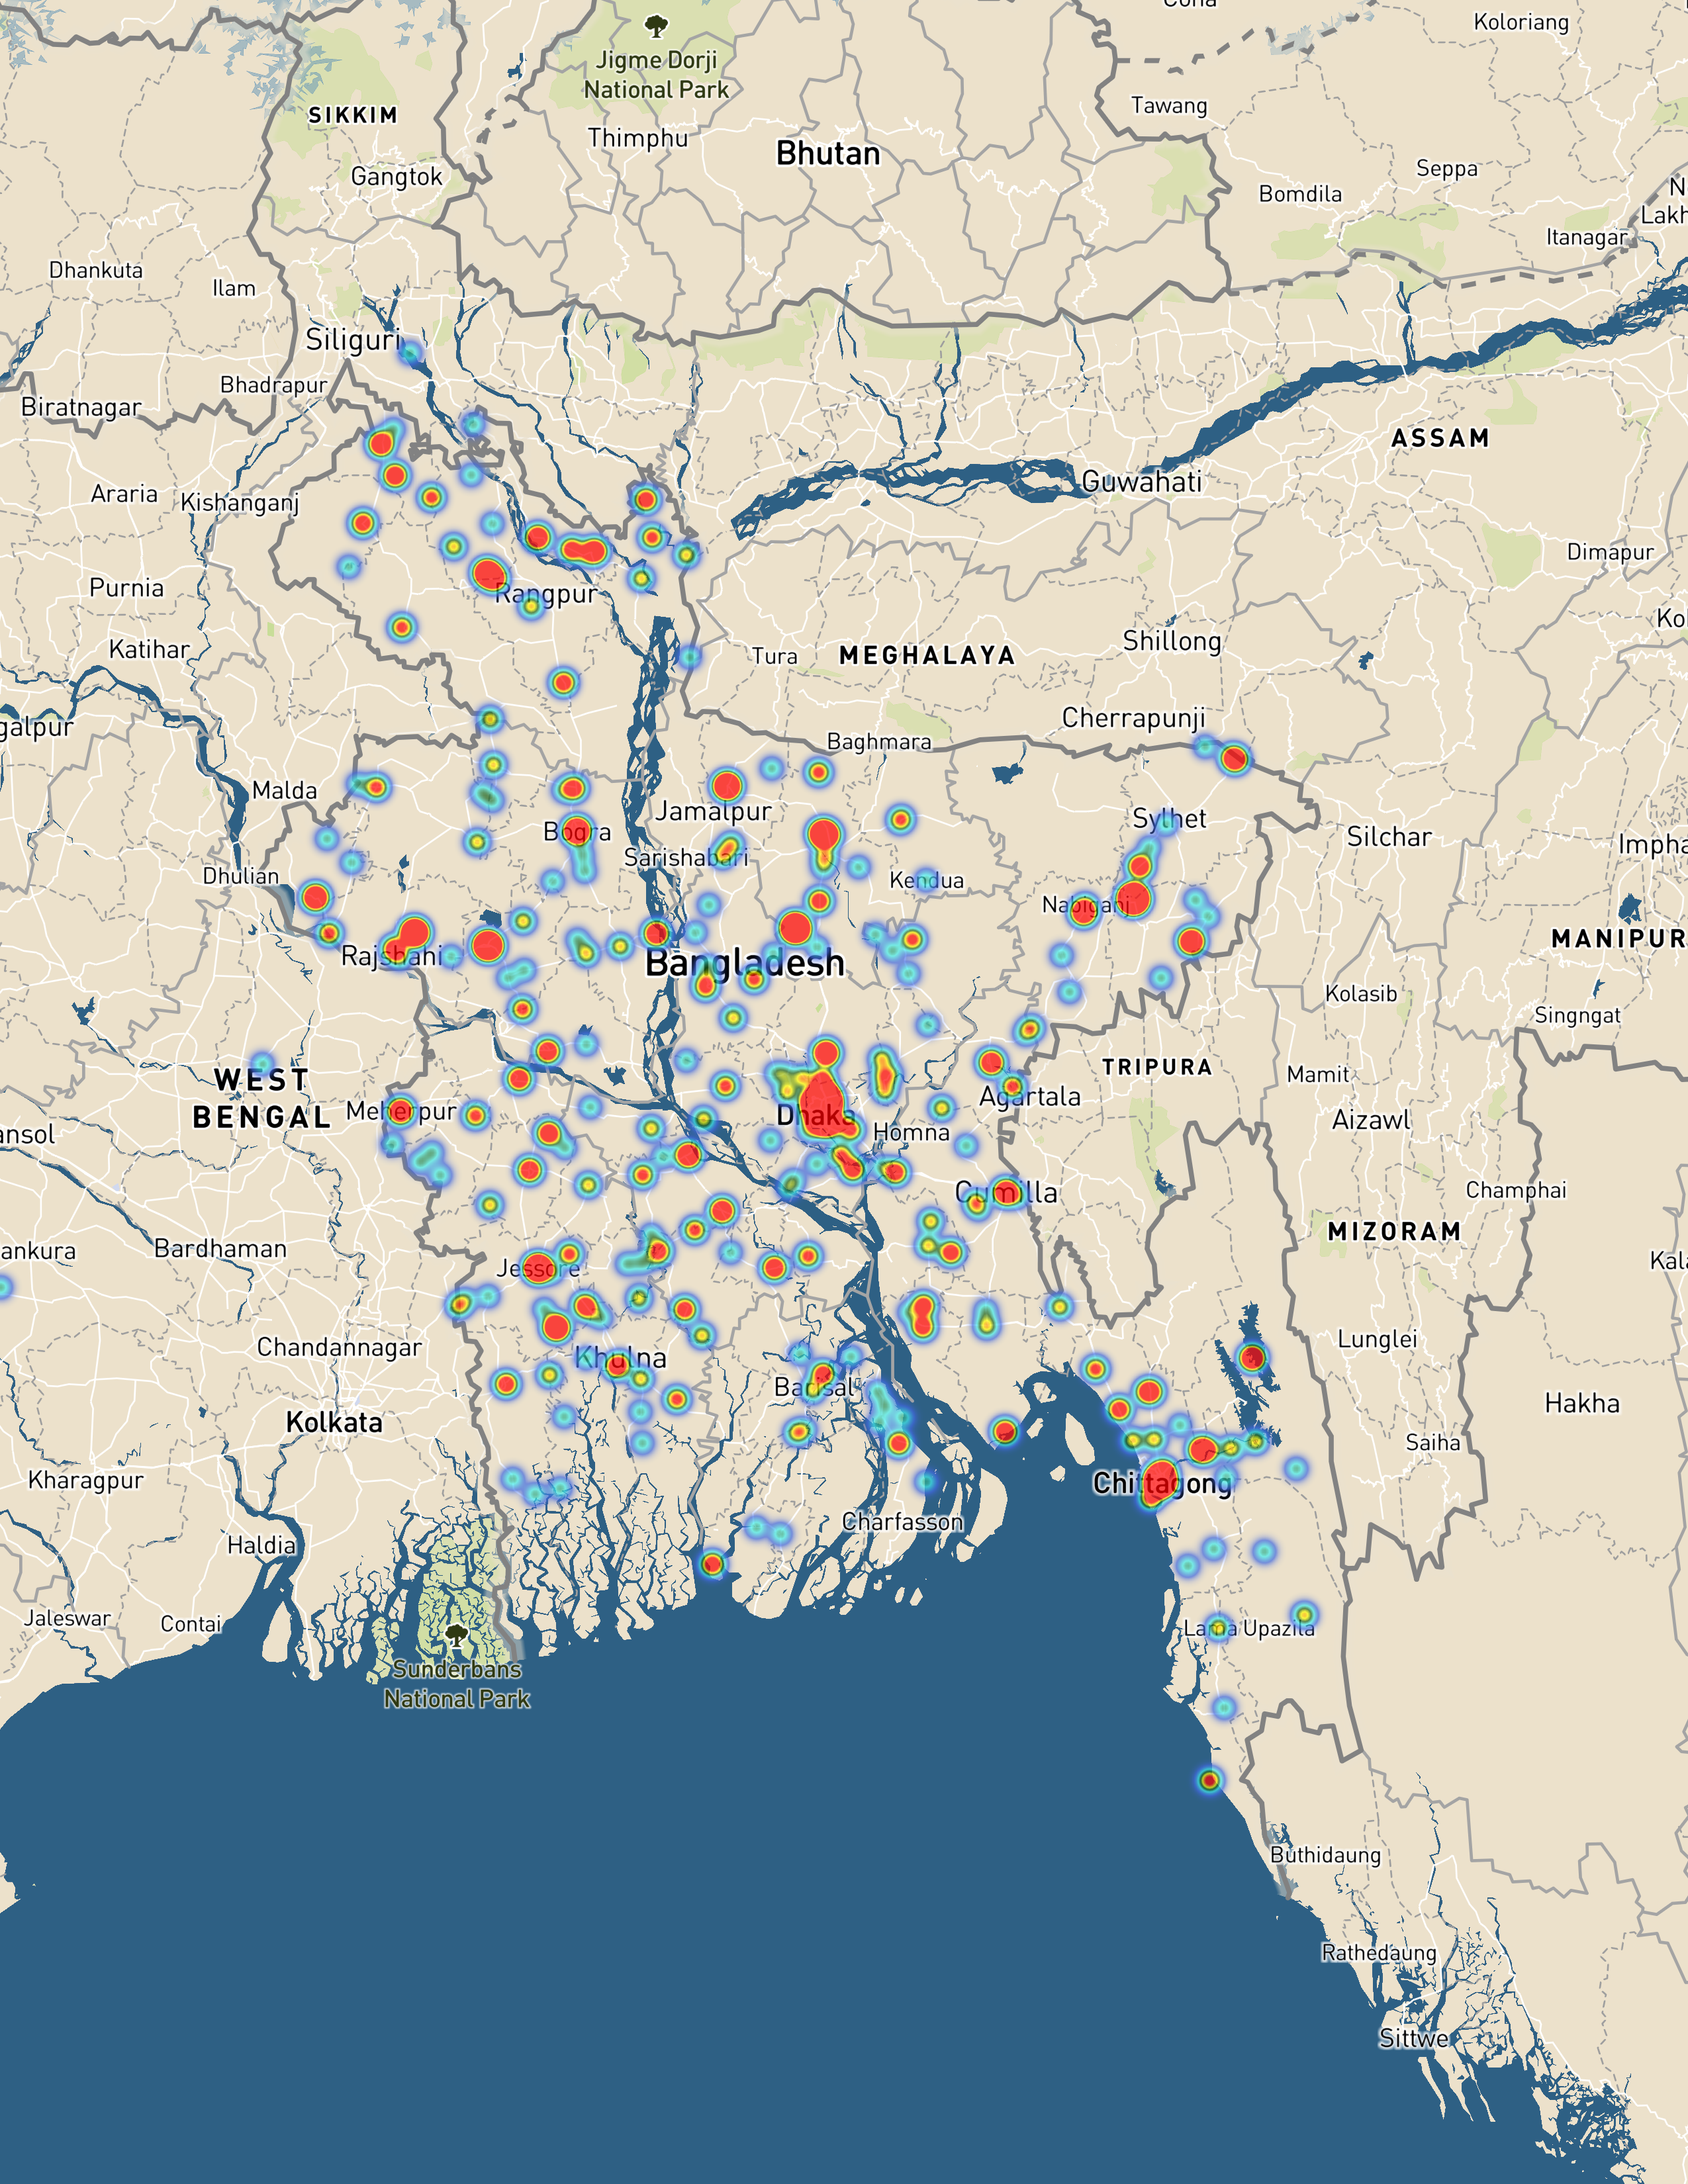